# Trabalho 2

## 4.1

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Variáveis

In [2]:
ficheiro = "../../ficheiros/Trabalho 2/Dados_Trabalho_TP2.csv"

label_encoder = LabelEncoder()

### 4.1.1

#### Colunas

| Sigla | Descrição                                                         |
|-------|-------------------------------------------------------------------|
| FCCAC | Frequência de Consumo de Comida Altamente Calórica                | 
| FCV   | Frequência de Consumo de Vegetais                                 | 
| NRP   | Número de Refeições Principais                                    |
| CCER  | Consumo de Comida Entre Refeições                                 |
| CA    | Consumo de Água                                                   |
| CBA   | Consumo de Bebidas Alcoólicas                                     |
| MCC   | Monitorização do Consumo Calorias Histórico de Obesidade Familiar | 

#### Leitura de dados



In [3]:
dados_lidos = pd.read_csv(ficheiro)

In [4]:
dados_lidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2111 non-null   int64  
 1   Genero                        2111 non-null   object 
 2   Idade                         2111 non-null   float64
 3   Altura                        2111 non-null   float64
 4   Peso                          2111 non-null   float64
 5   Historico_obesidade_familiar  2111 non-null   object 
 6   FCCAC                         2111 non-null   object 
 7   FCV                           2111 non-null   float64
 8   NRP                           2111 non-null   float64
 9   CCER                          2111 non-null   object 
 10  Fumador                       2111 non-null   object 
 11  CA                            2111 non-null   float64
 12  MCC                           2111 non-null   object 
 13  FAF

In [5]:
dados_lidos.describe()

,Unnamed: 0,Idade,Altura,Peso,FCV,NRP,CA,FAF,TUDE
count,2111.00000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1055.00000,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,609.53753,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,527.50000,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,1055.00000,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,1582.50000,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,2110.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
dados_lidos.head()

,Unnamed: 0,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
0,0,Feminino,21.0,1.62,64.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,0.0,1.0,Nao,Transportes_Publicos,Peso_Normal
1,1,Feminino,21.0,1.52,56.0,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transportes_Publicos,Peso_Normal
2,2,Masculino,23.0,1.80,77.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,1.0,Frequentemente,Transportes_Publicos,Peso_Normal
3,3,Masculino,27.0,1.80,87.0,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,0.0,Frequentemente,Caminhada,Excesso_Peso_Grau_I
4,4,Masculino,22.0,1.78,89.8,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II


In [7]:
nr_linhas, nr_colunas = dados_lidos.shape
print(f"nr linhas: {nr_linhas}")
print(f"nr colunas: {nr_colunas}")

nr linhas: 2111
nr colunas: 18


#### Identificar as classes da coluna Label

In [8]:
dados_lidos['Label'].unique()

array(['Peso_Normal', 'Excesso_Peso_Grau_I', 'Excesso_Peso_Grau_II',
       'Obesidade_Moderada', 'Magreza_Grau_I', 'Obesidade_Severa',
       'Magreza_Grau_II', 'Magreza_Grau_III', 'Obesidade_Mórbida'],
      dtype=object)

### Identificar as classes da coluna CCER

In [9]:
dados_lidos['CCER'].unique()

array(['Ocasionalmente', 'Frequentemente', 'Sempre', 'Não'], dtype=object)

#### identificar classes da coluna TRANS

In [10]:
dados_lidos['TRANS'].unique()

array(['Transportes_Publicos', 'Caminhada', 'Automovel', 'Mota',
       'Bicicleta'], dtype=object)

### 4.1.2

#### Remover coluna desnecessária

In [11]:
dados_trabalho = dados_lidos.drop(columns=dados_lidos.columns[0], axis=1)
dados_trabalho.head()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
0,Feminino,21.0,1.62,64.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,0.0,1.0,Nao,Transportes_Publicos,Peso_Normal
1,Feminino,21.0,1.52,56.0,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transportes_Publicos,Peso_Normal
2,Masculino,23.0,1.80,77.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,1.0,Frequentemente,Transportes_Publicos,Peso_Normal
3,Masculino,27.0,1.80,87.0,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,0.0,Frequentemente,Caminhada,Excesso_Peso_Grau_I
4,Masculino,22.0,1.78,89.8,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II


#### Derivar atributo 

In [12]:
dados_trabalho['IMC'] = dados_trabalho['Peso'] / (dados_trabalho['Altura'] * dados_trabalho['Altura'])
dados_trabalho.head()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.0,1.62,64.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,0.0,1.0,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.0,1.52,56.0,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.0,1.80,77.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,1.0,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.0,1.80,87.0,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,0.0,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.0,1.78,89.8,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381


### 4.1.3 Analisar os atributos do conjunto de dados mais significativos, usando gráficos, ...


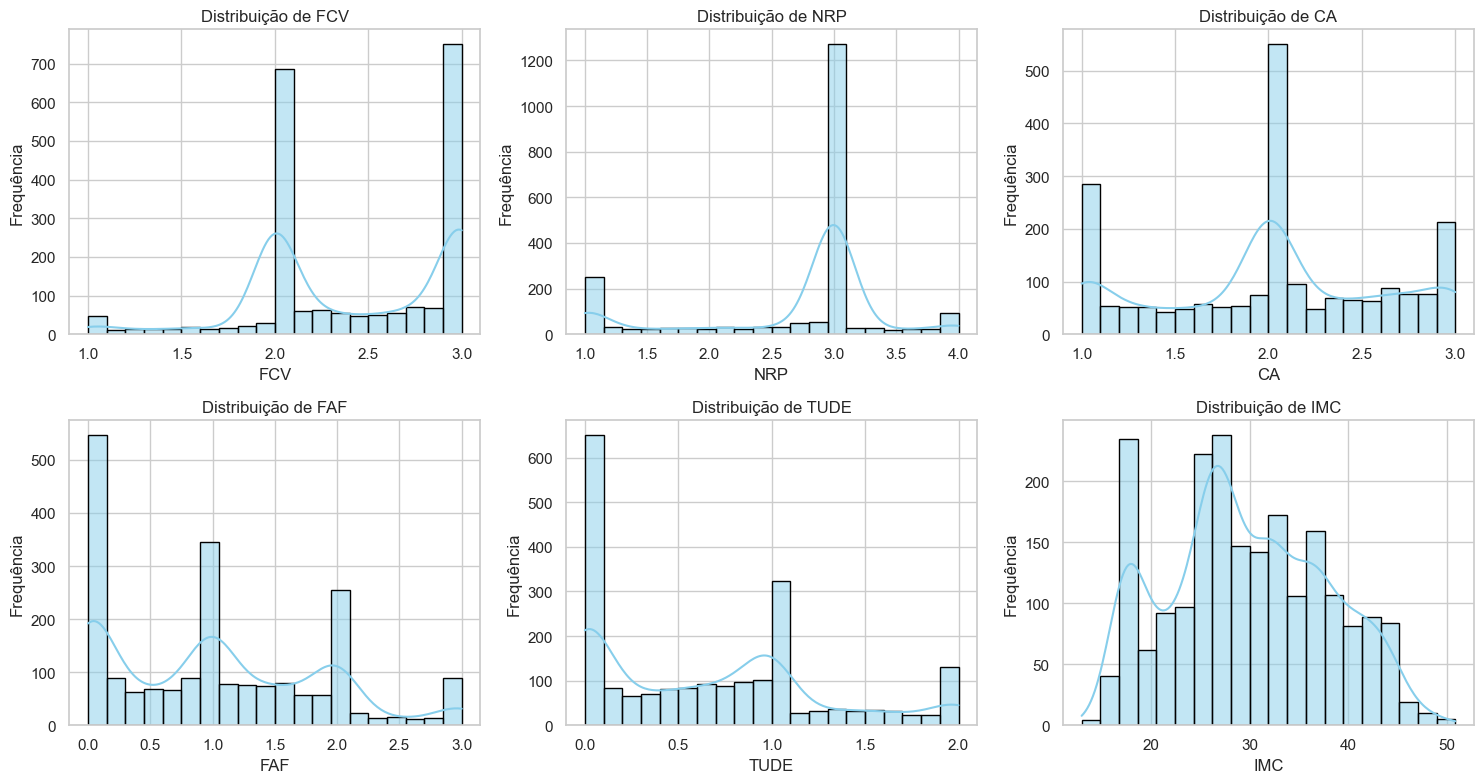

In [13]:
sns.set(style="whitegrid")
columns_plot = ['FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'IMC']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for i, column in enumerate(columns_plot):
    row = i // 3
    col = i % 3
    sns.histplot(dados_trabalho[column], bins=20, kde=True, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Distribuição de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequência')
plt.tight_layout()
plt.show()

#### Pie Charts

Text(0.5, 1.0, 'Transporte')

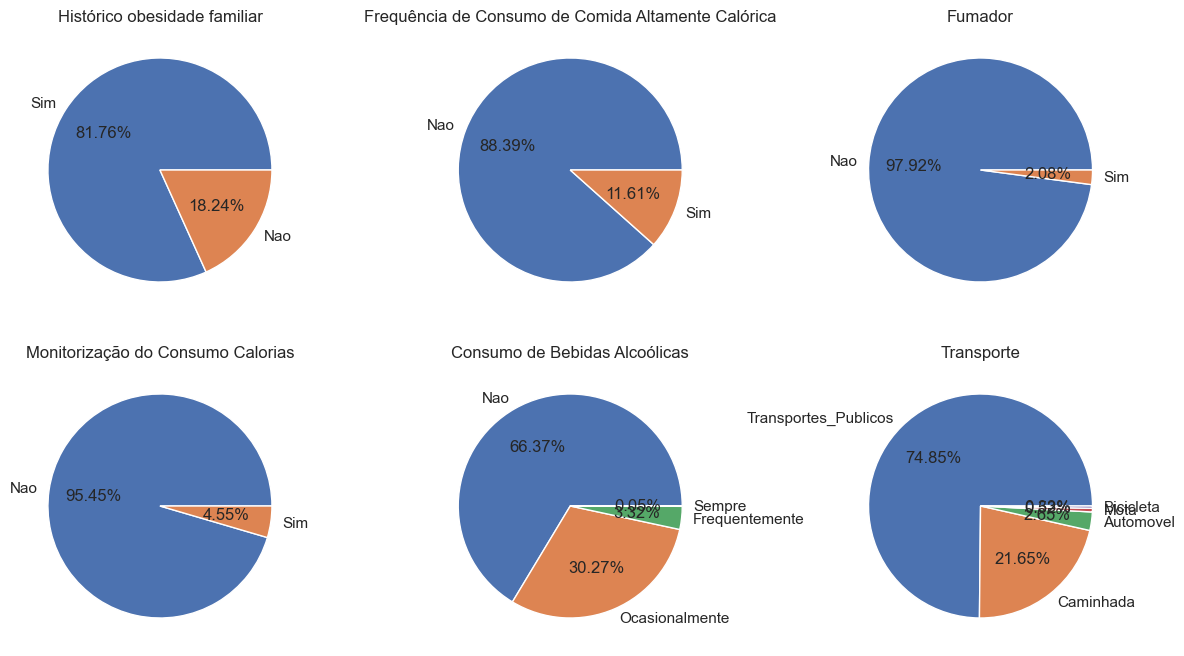

In [14]:
fig_pies, axes_pies = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

axes_pies[0, 0].pie(
    dados_trabalho["Historico_obesidade_familiar"].value_counts(),
    labels=dados_trabalho["Historico_obesidade_familiar"].unique(),
    autopct='%.2f%%',
)
axes_pies[0, 0].set_title("Histórico obesidade familiar")

axes_pies[0, 1].pie(
    dados_trabalho["FCCAC"].value_counts(),
    labels=dados_trabalho["FCCAC"].unique(),
    autopct='%.2f%%',
)
axes_pies[0, 1].set_title("Frequência de Consumo de Comida Altamente Calórica")

axes_pies[0, 2].pie(
    dados_trabalho["Fumador"].value_counts(),
    labels=dados_trabalho["Fumador"].unique(),
    autopct='%.2f%%',
)
axes_pies[0, 2].set_title("Fumador")

axes_pies[1, 0].pie(
    dados_trabalho["MCC"].value_counts(),
    labels=dados_trabalho["MCC"].unique(),
    autopct='%.2f%%',
)
axes_pies[1, 0].set_title("Monitorização do Consumo Calorias")

axes_pies[1, 1].pie(
    dados_trabalho["CBA"].value_counts(),
    labels=dados_trabalho["CBA"].unique(),
    autopct='%.2f%%',
)
axes_pies[1, 1].set_title("Consumo de Bebidas Alcoólicas")

axes_pies[1, 2].pie(
    dados_trabalho["TRANS"].value_counts(),
    labels=dados_trabalho["TRANS"].unique(),
    autopct='%.2f%%',
)
axes_pies[1, 2].set_title("Transporte")


#### Matriz de Correlação

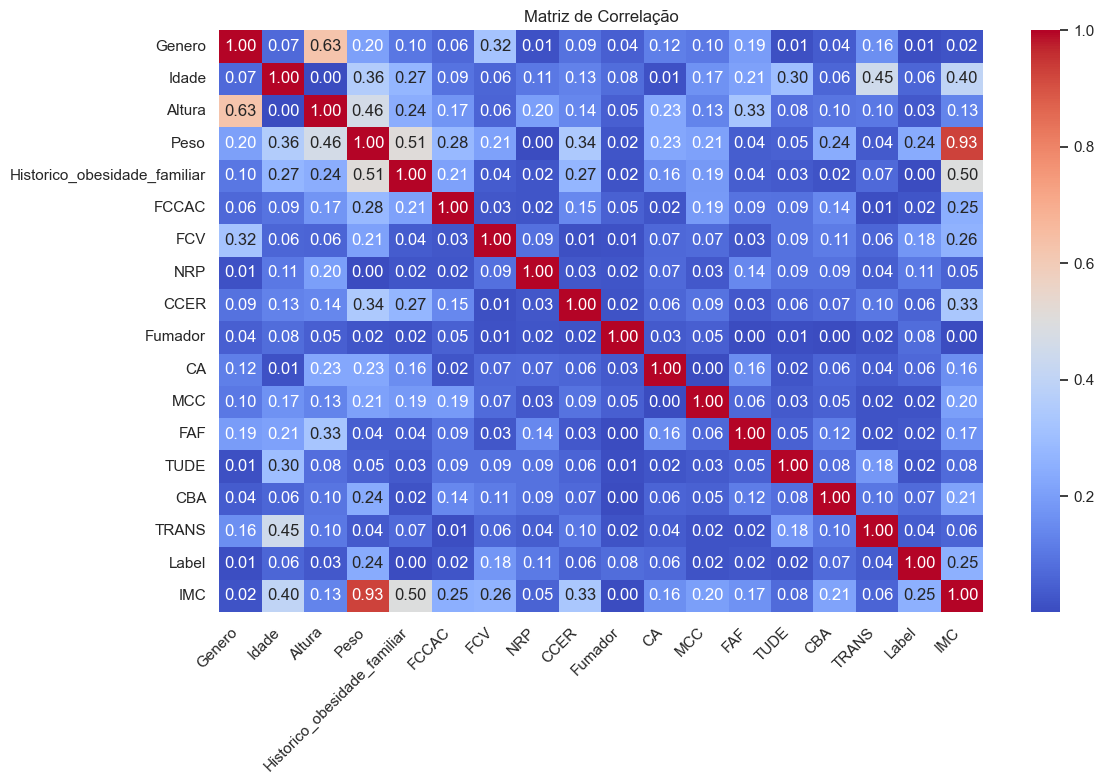

In [15]:
df1 = dados_trabalho.copy()
plt.figure(figsize=(12, 8))
for i in ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS', 'Label']:
    df1[i] = label_encoder.fit_transform(df1[i].values)
sns.heatmap(df1.corr(method="spearman").abs(), cmap='coolwarm', annot=True, fmt='.2f', mask=False)
plt.xticks(ticks=[i + 0.5 for i in range(len(df1.columns))], labels=df1.columns, rotation=45, ha='right')
plt.yticks(ticks=[i + 0.5 for i in range(len(df1.columns))], labels=df1.columns)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

#### visualização de outliers

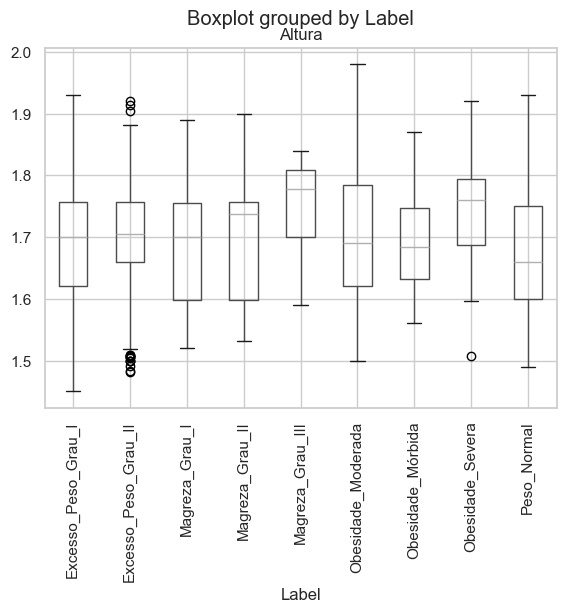

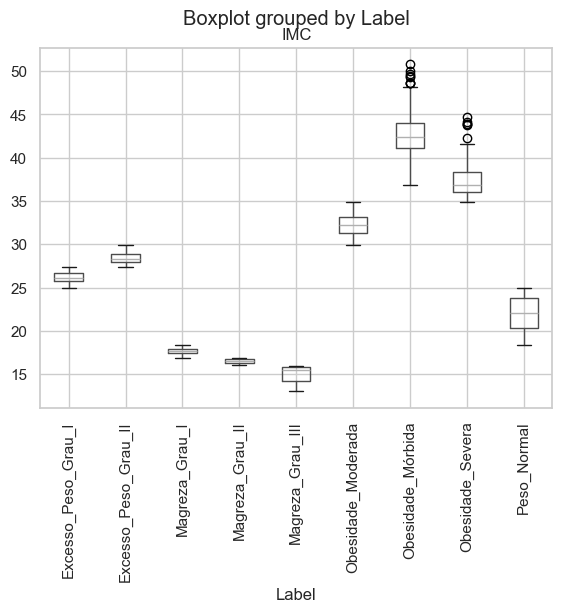

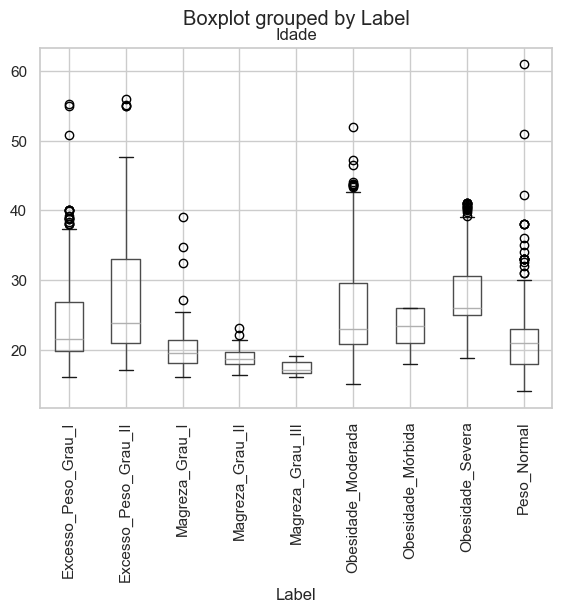

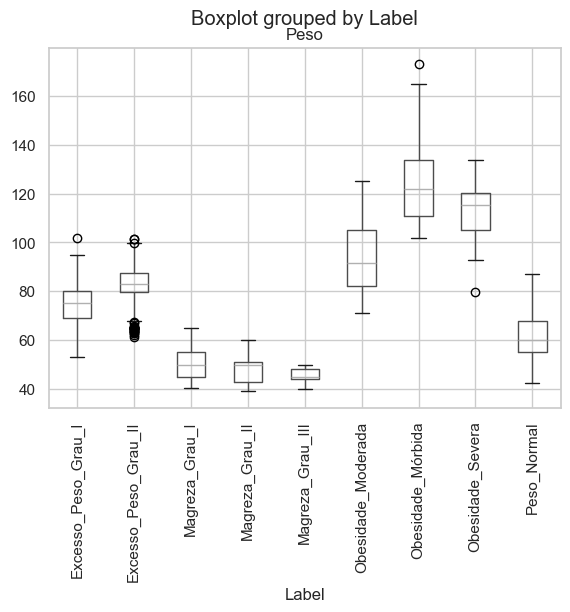

In [16]:
for i in dados_trabalho.columns.difference(['FCV', 'NRP', 'CA', 'FAF', 'TUDE']):
    if (dados_trabalho[i].dtype != 'object'):
        dados_trabalho.boxplot(by="Label", column=[i], grid=False, return_type="dict")
        plt.xticks(rotation=90)
        plt.grid(True)
plt.show()

### 4.1.4
#### a) Identificação de NAN e "limpar" o dataset.

In [17]:
dados_trabalho[dados_trabalho.isnull().any(axis=1)]

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC


#### Transformar classes em valores

In [18]:
for i in ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS']:
    dados_trabalho[i] = label_encoder.fit_transform(dados_trabalho[i].values)

dados_trabalho.head()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,1,4,Peso_Normal,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,4,Peso_Normal,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,0,4,Peso_Normal,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,0,2,Excesso_Peso_Grau_I,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,4,Excesso_Peso_Grau_II,28.342381


#### Separar os dados em target(y) e feature(x)

In [19]:
y = dados_trabalho.loc[:, "Label"].values
X = dados_trabalho.drop(["Label"], axis=1).values

#labelencoder no y
le = LabelEncoder()
y = le.fit_transform(y)

#divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape

((1477, 17), (634, 17))

### Árvore de decisão

In [20]:
clf = DecisionTreeClassifier(random_state=42)
#build the model with training sets
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

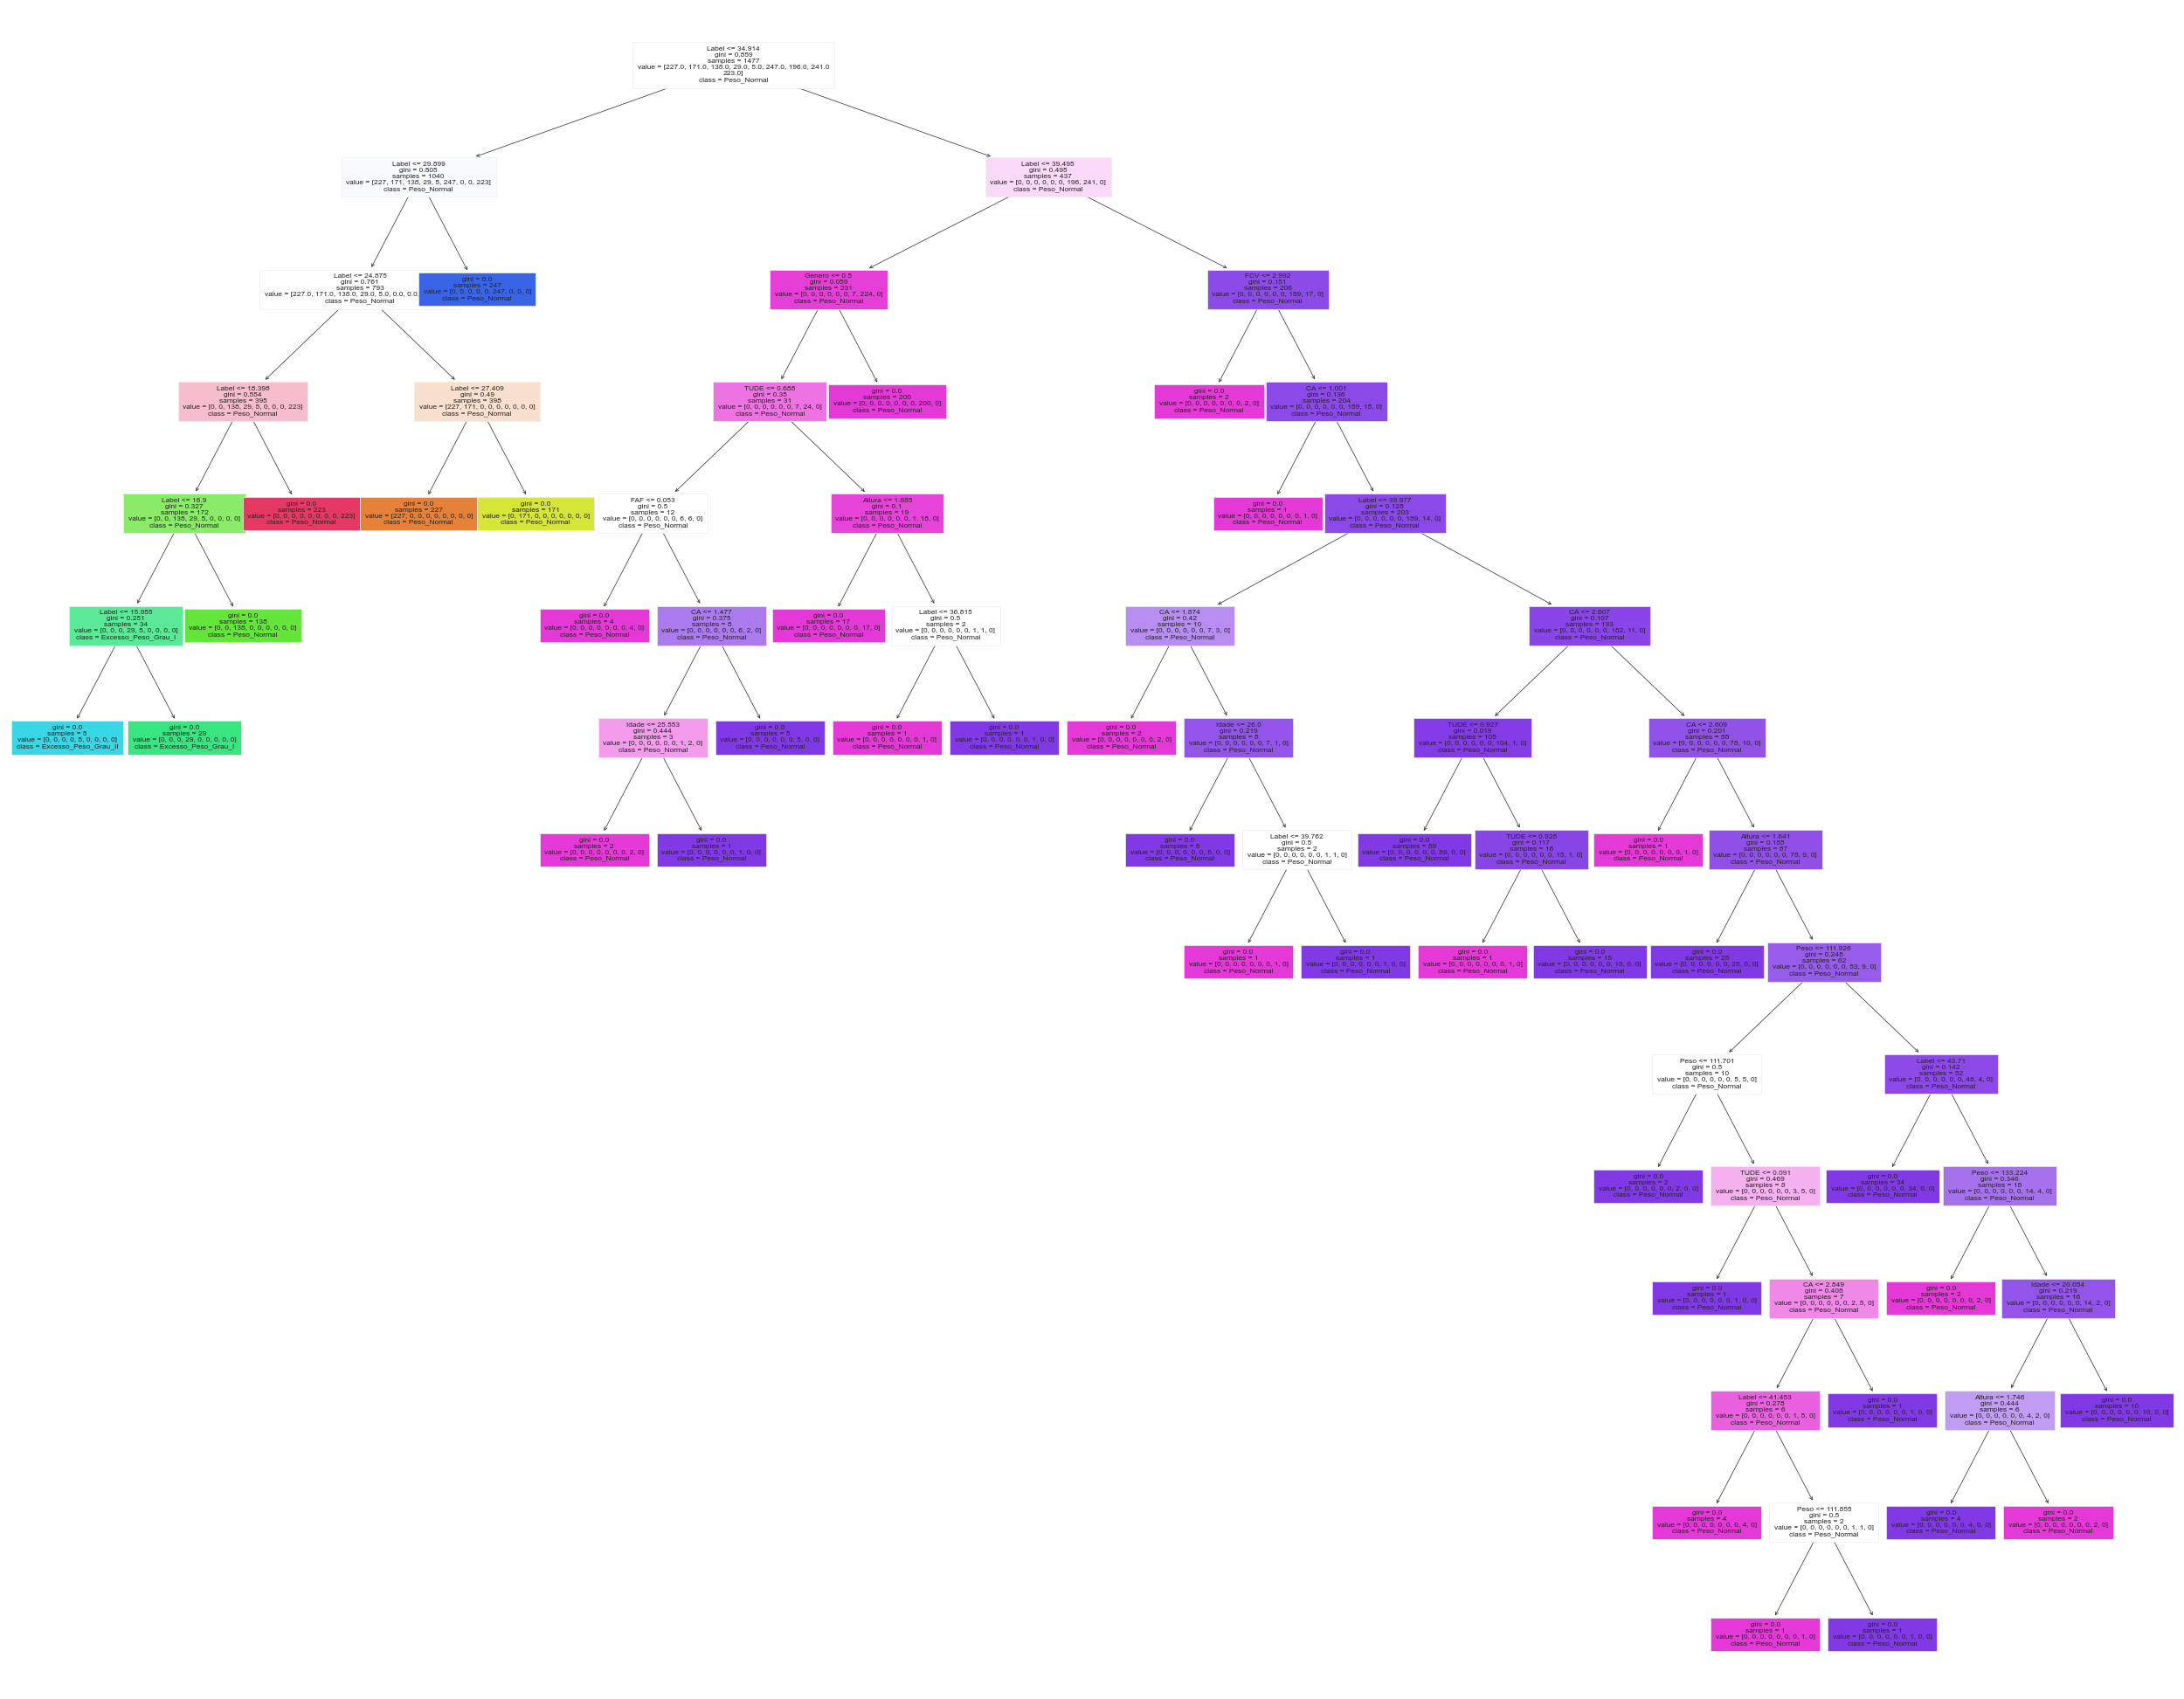

In [21]:
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(32, 25))  # set plot size (denoted in inches)
plot_tree(clf,
          feature_names=list(dados_trabalho.columns),
          class_names=list(dados_trabalho['Label']),
          filled=True,
          fontsize=6);

In [22]:
#verificar a precisão dos dados de treino e teste
clf.score(X_train, y_train)

1.0

In [23]:
# Previsões com decision tree
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Avaliação dos dados de treino e teste
tree_train = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", tree_train)
tree_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", tree_test)

Train Accuracy: 1.0
Test Accuracy: 0.9668769716088328


In [24]:
# Rate de erro da decision three
cmatrix = confusion_matrix(y_true=y_train, y_pred=clf.predict(X_train), labels=[True, False])
print("Confusion Matrix Training")
print(cmatrix)

# Error rate dos dados de treino
error_rate = (cmatrix[0, 1] + cmatrix[1, 0]) / cmatrix.sum()
print("Training Error Rate:", error_rate)
print("---------------------------------")
ypred = clf.predict(X_test)
cmatrix = confusion_matrix(y_true=y_test, y_pred=ypred, labels=[True, False])
print("Confusion Matrix Test")
print(cmatrix)

# Error rate dos dados de teste
error_rate_test = (cmatrix[0, 1] + cmatrix[1, 0]) / cmatrix.sum()
print("Test Error Rate:", error_rate_test)

Confusion Matrix Training
[[171   0]
 [  0 227]]
Training Error Rate: 0.0
---------------------------------
Confusion Matrix Test
[[ 67   0]
 [  0 101]]
Test Error Rate: 0.0


Classification report Decision Tree: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00       123
           6       0.87      0.87      0.87        75
           7       0.90      0.90      0.90        96
           8       1.00      0.99      0.99        82

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



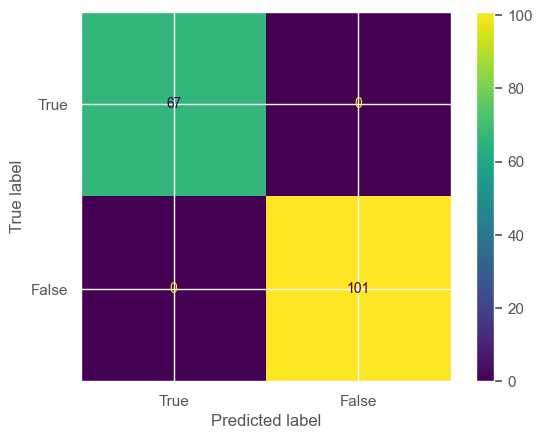

In [25]:
# Matriz de confusão 
def matriz_confusao(actual, predicted):
    # outcome values order in sklearn
    matrix = confusion_matrix(y_true=actual, y_pred=predicted, labels=[True, False])
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[True, False])
    disp.plot()

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(actual, predicted)
    print('Classification report Decision Tree: \n', matrix)


# chamada à função
res = matriz_confusao(y_test, ypred)

In [26]:
# K-Fold Cross Validation - implementation
# Splitting the Data into Folds

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds


# Define the number of folds (K)
k = 5

# Get the fold indices
fold_indices = kfold_indices(X, k)

NameError: name 'np' is not defined

In [ ]:
model = DecisionTreeClassifier()

scores = []
prevs_folds = []
y_folds = []
# Iterate through each fold
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    # Train the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)

    # Append the fold score to the list of scores
    scores.append(fold_score)

    # Append the prevs and labels of the test set
    prevs_folds.append(y_pred)
    y_folds.append(y_test)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)

In [ ]:
# Reconstruir a arvore com diferentes valores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
import numpy as np

max_depths = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# For each of these values, we want to run the full model cascade from start to finish. 
# We also want to record the train and test scores. We do this in a for loop:
train_score = []
test_score = []
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.2, 1.1)
plt.legend();

In [ ]:
# What about the minimum numbers of samples required to make a node a leaf node? (another Hyperparameter)

train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    clf = DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.ylim(0.7, 1)
plt.legend()